In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
sales = pd.read_csv("5-3-1-lm-model.csv")
sales.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


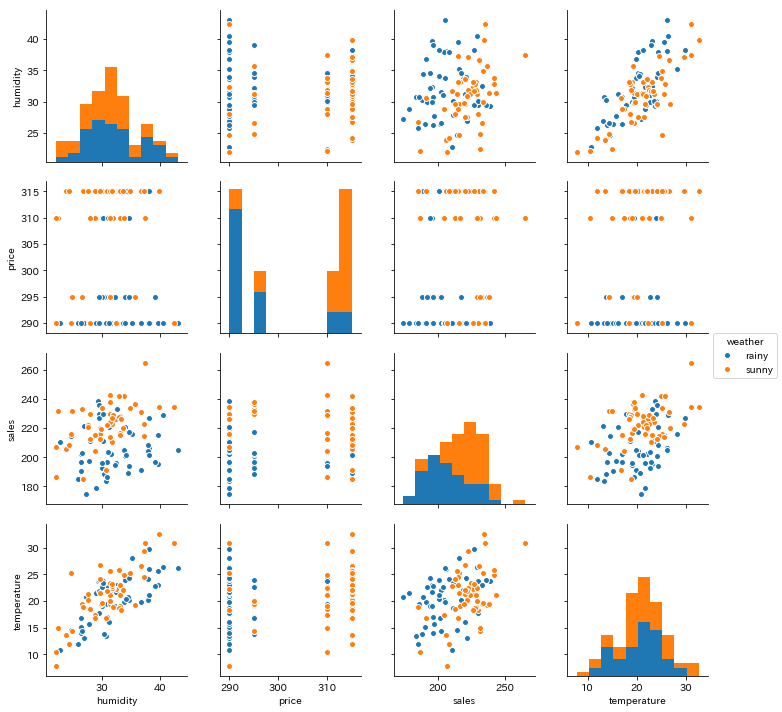

In [8]:
#　天気別に色分けしたグラフを描く
sns.pairplot(data = sales, hue = "weather")

# 悪い分析例
```
説明変数が複数必要なのに1つだけ選んでモデルを構築し、分析を進める
```

In [9]:
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [10]:
sm.stats.anova_lm(lm_dame, type=2)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
price,1.0,1398.392322,1398.392322,4.970685,0.028064
Residual,98.0,27570.133578,281.327894,NaN,NaN


有意であることが確認できる
右肩上がりの直線が引かれており、価格をあげれば売上が上がると考察してしまいそう


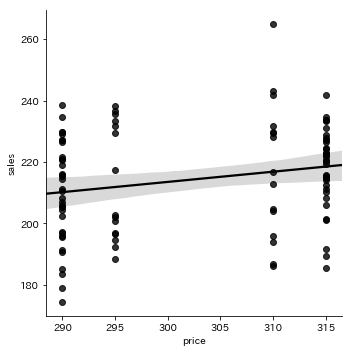

In [12]:
print("有意であることが確認できる\n右肩上がりの直線が引かれており、価格をあげれば売上が上がると考察してしまいそう")
sns.lmplot(x = "price", y = "sales", data = sales,
           scatter_kws = {"color":"black"},
          line_kws = {"color":"black"})

In [13]:
sales.groupby("weather").mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


```
売上は雨の時に低くなっている。
これは雨の日には売上が下がるので、その対策としてお店が値引きをしていたと考えるのが自然。
ここで木になるのは”天気が同じだった時の、商品価格が売上にもたらす影響”
可視化する。
```

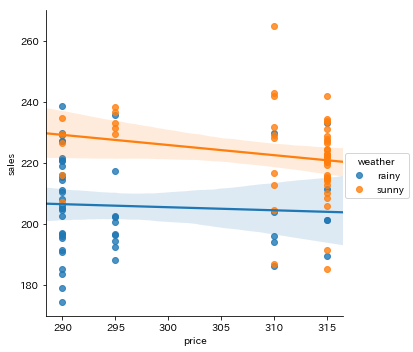

In [17]:
sns.lmplot(x = "price", y = "sales", data = sales, hue = "weather")

```
気づき
晴れの日は売上が高い。
価格が高くなると売上が下がる。
```

# 複数の説明変数をもつモデル

In [18]:
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data = sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

```
気づき：
価格が上がると売上が下がる。

```

# 悪い分析例：通常の分散分析で検定する

In [21]:
sm.stats.anova_lm(lm_sales, typ=1).round(3)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [22]:
lm_sales_2 = smf.ols("sales ~ weather + temperature + humidity + price", data = sales).fit()
sm.stats.anova_lm(lm_sales_2, typ=1).round(3)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [23]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [24]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [31]:
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = sp.sum(mod_null.resid**2)
print("nullモデル : {:.3f}".format(resid_sq_null))

nullモデル : 28968.526


In [33]:
mod_1 = smf.ols("sales ~ weather", sales).fit()
resid_sq_1 = sp.sum(mod_1.resid**2)
print("モデル 天気 : {:.3f}".format(resid_sq_1))

モデル 天気 : 21917.565


In [35]:
print("残差平方和の差：{:.3f}".format(resid_sq_null - resid_sq_1))

残差平方和の差：7050.961


In [37]:
sm.stats.anova_lm(mod_1).round(3)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,31.527,0.0
Residual,98.0,21917.565,223.649,NaN,NaN


In [39]:
mod_2 = smf.ols("sales ~ weather + humidity", sales).fit()
resid_sq_2 = sp.sum(mod_2.resid**2)
print("モデル 湿度 : {:.3f}".format(resid_sq_2))

モデル 湿度 : 20137.964


In [40]:
print("残差平方和の差：{:.3f}".format(resid_sq_1 - resid_sq_2))

残差平方和の差：1779.601


In [41]:
sm.stats.anova_lm(mod_2).round(3)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,33.963,0.000
humidity,1.0,1779.601,1779.601,8.572,0.004
Residual,97.0,20137.964,207.608,NaN,NaN


In [43]:
#　天気 + 気温の残差平方和
mod_2_2 = smf.ols("sales ~ weather + temperature", sales).fit()
resid_sq_2_2 = sp.sum(mod_2_2.resid**2)
print("モデル: {:.3f}".format(resid_sq_2_2))

モデル 気温 : 18102.786


In [44]:
#　天気 + 気温 + 湿度　の残差平方和
mod_3_2 = smf.ols("sales ~ weather + temperature + humidity", sales).fit()
resid_sq_3_2 = sp.sum(mod_3_2.resid**2)
print("モデル: {:.3f}".format(resid_sq_3_2))

モデル: 18061.119


In [45]:
resid_sq_2_2 - resid_sq_3_2

41.6670651237946